# Логистическая регрессия

## Задача классификации

Рассмотренные ранее регрессионные модели подразумевают, что целевая переменная $Y$ является *количественной*. Однако, зачастую независимая переменная является *качественной*.
Например, цвет глаз - качественная переменная.
Часто качественные переменные называют *категориальными* (эти термины взаимозаменяемы). Предсказание качественного отклика для некоторого наблюдения можно назвать классификацией, поскольку это наблюдение относят к определенной категории (классу). 

С другой стороны, методы классификации часто в качестве основы для выполнения классификации сначала предсказывают вероятность каждой из категорий качественной переменной и в этом смысле они ведут себя подобно методам регрессии.

**Примеры задач классификации:**
* Определить, входящий e-mail спам, или нет?
* Определить, является ли банковская транзакция мошеннической, или нет?
* Определить, опухоль является злокачественной или доброкачественной?

Что объединяет примеры выше?
У всех этих примеров ответ целевой переменной да или нет. Таким образом, $Y = \{0,1\}$, т.е. мы имеем дело с **бинарной классификацией**.
Т.е. 
* $Y = 1$ - позитивный класс (Positive class) - часто выражает присутствие чего-либо;
* $Y = 0$ - негативный класс (Negative class) - часто выражает отсутствие чего-либо;

Мы начнем рассмотрение бинарной классификации, и затем рассмотрим многоклассовую классификацию (хотя, по своей сути она просто расширение бинарной классификации).



Как мы можем разработать алгоритм классификации?

Итак, рассмотрим пример с опухолью: предсказать, является ли опухоль злокачественной (0 или 1) по размеру опухоли.
Сначала рассмотрим данные на графике:

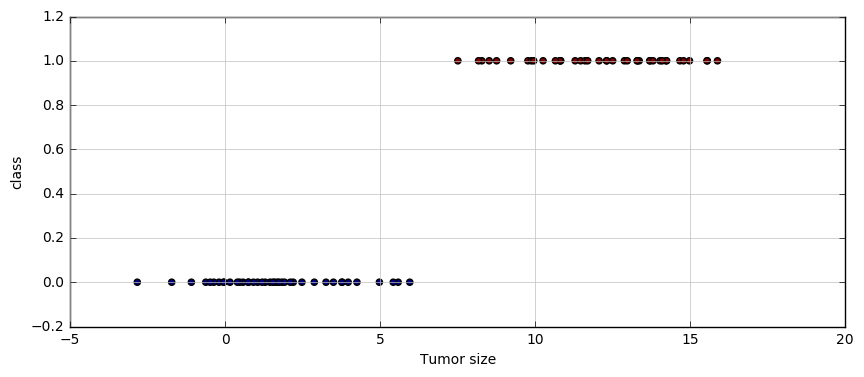

In [2]:
# Подключение необходимых модулей
%matplotlib inline
import numpy as np
from scipy.stats import norm
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot


np.random.seed(3)
num_per_class = 40
X = np.hstack((norm.rvs(2, size=num_per_class, scale=2),
              norm.rvs(12, size=num_per_class, scale=2)))
y = np.hstack((np.zeros(num_per_class),
               np.ones(num_per_class)))

X_test = np.arange(-5, 20, 0.1)
pyplot.figure(figsize=(10, 4))
pyplot.xlim((-5, 20))
pyplot.scatter(X, y, c=y)
pyplot.xlabel("Tumor size")
pyplot.ylabel("class")
pyplot.grid(True, linestyle='-', color='0.75')

Попробуем использовать линейную регрессию.

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)


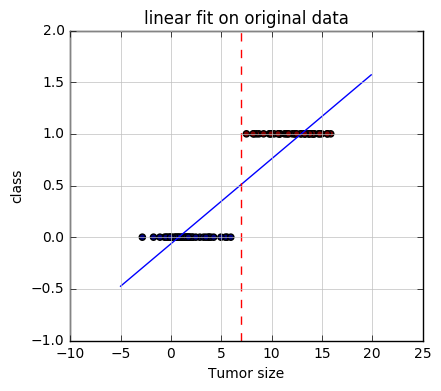

In [3]:
def lin_model(clf, X):
    return clf.intercept_ + clf.coef_ * X

from sklearn.linear_model import LinearRegression
clf = LinearRegression()
print(clf)
clf.fit(X.reshape(num_per_class * 2, 1), y)
X_odds = np.arange(0, 1, 0.001)
pyplot.figure(figsize=(10, 4))
pyplot.subplot(1, 2, 1)
pyplot.scatter(X, y, c=y)
pyplot.plot(X_test, lin_model(clf, X_test))
#pyplot.plot(X_test, np.ones(X_test.shape[0]) * 0.5, "--")
#pyplot.plot(np.ones(X_test.shape[0]) * 7, np.ones(X_test.shape[0]) * 0.5, "--")
pyplot.axvline(7, linestyle= "--", color='r')

pyplot.xlabel("Tumor size")
pyplot.ylabel("class")
pyplot.title("linear fit on original data")
pyplot.grid(True, linestyle='-', color='0.75')

Используя линейную регрессию, выберем границу классификатора (т.е. все что больше - 1, все что меньше - 0).
Как можно увидеть, данные хорошо разделяются на один из двух классов?

Но что, если в данных есть пример злокачественной опухоли с очень малым её размером?
Это бы привело к неправильной классификации остальных примеров.

Например, если мы имеем следующие данные:

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
[ 0.06689214] [ 1.84663176]
P(x=-1)=0.03	P(x=7)=0.83


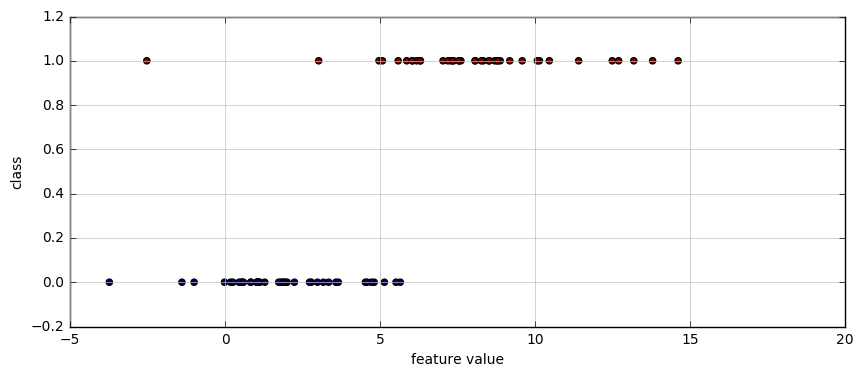

In [15]:
num_per_class = 40
X = np.hstack((norm.rvs(2, size=num_per_class, scale=2),
              norm.rvs(8, size=num_per_class, scale=3)))
y = np.hstack((np.zeros(num_per_class),
               np.ones(num_per_class)))

def lr_model(clf, X):
    return 1.0 / (1.0 + np.exp(-(clf.intercept_ + clf.coef_ * X)))

from sklearn.linear_model import LogisticRegression
logclf = LogisticRegression()
print(logclf)
logclf.fit(X.reshape(num_per_class * 2, 1), y)
print(np.exp(logclf.intercept_), np.exp(logclf.coef_.ravel()))
print("P(x=-1)=%.2f\tP(x=7)=%.2f" %
      (lr_model(logclf, -1), lr_model(logclf, 7)))
X_test = np.arange(-5, 20, 0.1)
pyplot.figure(figsize=(10, 4))
pyplot.xlim((-5, 20))
pyplot.scatter(X, y, c=y)
pyplot.xlabel("feature value")
pyplot.ylabel("class")
pyplot.grid(True, linestyle='-', color='0.75')



В этом случае уже нет хорошего разделения по классам, и как следствие нет "порогового" значения (threshold limit).

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)


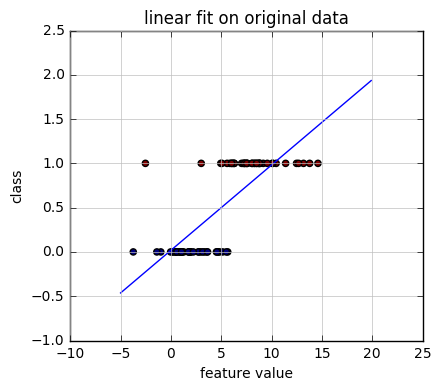

In [16]:
def lin_model(clf, X):
    return clf.intercept_ + clf.coef_ * X

from sklearn.linear_model import LinearRegression
clf = LinearRegression()
print(clf)
clf.fit(X.reshape(num_per_class * 2, 1), y)
X_odds = np.arange(0, 1, 0.001)
pyplot.figure(figsize=(10, 4))
pyplot.subplot(1, 2, 1)
pyplot.scatter(X, y, c=y)
pyplot.plot(X_test, lin_model(clf, X_test))
pyplot.xlabel("feature value")
pyplot.ylabel("class")
pyplot.title("linear fit on original data")
pyplot.grid(True, linestyle='-', color='0.75')

**Какая еще проблема с линейной регрессией?**

В качестве ответов, целевой переменной $Y$ нам известны только значения $0$ и $1$.

В то же время, гипотеза может давать значения как большие $1$, так и меньшие чем $0$.

Применяется **логистическая регрессия**. 
**Логистическая регрессия** генерирует значения, которые всегда либо $0$, либо $1$. 

Обратите внимание, что **логистическая регрессия представляет собой алгоритм классификации**.

## Представление гипотезы

Какая функция используется для представления нашей гипотезы в задаче классификации?
Так, в обычной линейной регрессии в качестве гипотезы рассматривалась обычная линейная функция: 
$$h_w(x) = w_0 + w_1 x_1 + ... + w_p x_p = \sum_{i=1}^{p}w_i x_i + w_0$$
Или, в векторном представлении:
$$h_w(x) = w^Tx,$$
где $\begin{align}
    w &= \begin{bmatrix}
           w_{0} \\
           w_{1} \\
           \vdots \\
           w_{p}
         \end{bmatrix}
  \end{align}$ - вектор весов, $\begin{align}
    x &= \begin{bmatrix}
           x_{0} \\
           x_{1} \\
           \vdots \\
           x_{p}
         \end{bmatrix} = 
         \begin{bmatrix}
           1 \\
           x_{1} \\
           \vdots \\
           x_{p}
         \end{bmatrix}
  \end{align}$ - значения instance.


Мы хотим, чтобы выходом классификатора были только значения между $0$ и $1$. 
Поэтому, для репрезентации гипотезы классификатора просто применим некоторую функцию, к линейной регрессии, т.е.
$$h_w(x) = g(w^{T}x),$$
где $g(z)$ определяется как действительное число:
$$g(z) = \frac{1}{1 + e^{-z}}$$.
Эта функция называется **сигмоидальной функцией (сигмоидой)** или **логистической функцией**.

Мы можем скомбинировать эти записи, тогда функция будет иметь следующий вид:
$$h_w(x) = \frac{1}{1 + e^{-w^{T}x}}$$.

Как выглядит логистическая функция?

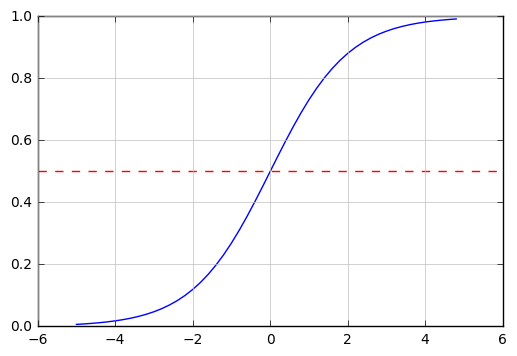

In [4]:
# evenly sampled time at 200ms intervals
t = np.arange(-5., 5., 0.2)

# red dashes, blue squares and green triangles
pyplot.plot(t, 1.0/(1+np.exp(-t)))
#pyplot.axvline(0, linestyle= "--", color='r')
pyplot.axhline(0.5, linestyle= "--", color='r')

pyplot.grid(True, linestyle='-', color='0.75')
pyplot.show()

В точке $0$ значение $0.5$, асимптотические линии $0$ и $1$.
Итак, нам нужно подобрать значения $w$ для наших данных.

## Интерпретация гипотезы

Наша гипотеза $h_w(x)$ дает нам число, и мы рассматриваем это значение как **вероятность того, что мы получим значение целевой переменной $y$ при входе $x$**.

Пример:
Если $x$ - вектор атрибутов: $x = (x_0, x_1)$, $x_0 = 1$ (как и всегда), и $x_1$ - размер опухоли.
Тогда $h_w(x) = 0.7$ говорит пациенту, что он имеет $70%$ вероятность того, что опухоль является злокачественной.

Это можно записать в следующей нотации: $h_w(x) = \Pr (y=1 \mid x; w)$

**Что это означает?**
Вероятность того, что $y=1$ при заданном $x$ параметризуется вектором $w$.
Поскольку *пока* мы рассматриваем бинарную классификацию, мы знаем только два исхода $y$: $y=0$ и $y=1$.
Поэтому, следующие утверждения должны быть истинными:
$$\Pr(y=1\mid x; w) + \Pr(y=0 \mid x ; w) = 1$$
откуда:
$$\Pr(y=0 \mid x ; w) = 1 - \Pr(y=1\mid x; w).$$


## Логистическая регрессия на примере

Итак, рассмотрим еще раз пример.
На график нанесены значения некоторого гипотетического признака $X$ и соответствующие классы $0$ и $1$. 
Данные зашумлены и классы перекрываются в диапазоне значений признака от $1$ до $6$. Поэтому следует моделировать не сами дискретные классы, а вероятность того, что значение признака принадлежит классу $1$ : $\Pr(X)$.

Имя такую модель, мы можем сказать, что образец принадлежит классу, если $\Pr(X) > 0.5$ и классу $0$ в противном случае.

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
[ 0.04613859] [ 2.08099356]
P(x=-1)=0.02	P(x=7)=0.89


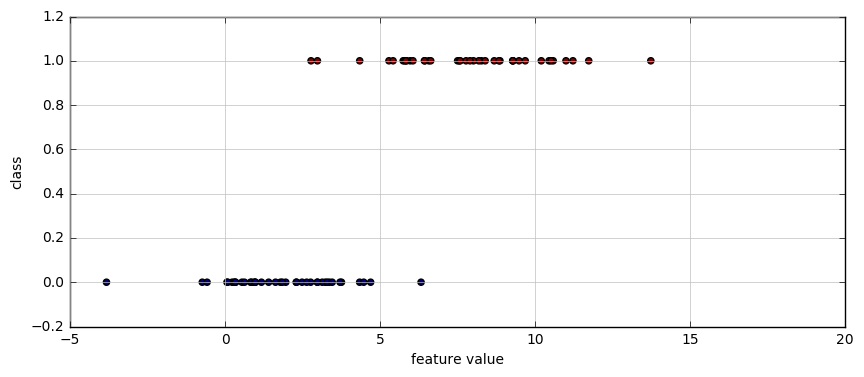

In [15]:
num_per_class = 40
X = np.hstack((norm.rvs(2, size=num_per_class, scale=2),
              norm.rvs(8, size=num_per_class, scale=3)))
y = np.hstack((np.zeros(num_per_class),
               np.ones(num_per_class)))

def lr_model(clf, X):
    return 1.0 / (1.0 + np.exp(-(clf.intercept_ + clf.coef_ * X)))

from sklearn.linear_model import LogisticRegression
logclf = LogisticRegression()
print(logclf)
logclf.fit(X.reshape(num_per_class * 2, 1), y)
print(np.exp(logclf.intercept_), np.exp(logclf.coef_.ravel()))
print("P(x=-1)=%.2f\tP(x=7)=%.2f" %
      (lr_model(logclf, -1), lr_model(logclf, 7)))
X_test = np.arange(-5, 20, 0.1)
pyplot.figure(figsize=(10, 4))
pyplot.xlim((-5, 20))
pyplot.scatter(X, y, c=y)
pyplot.xlabel("feature value")
pyplot.ylabel("class")
pyplot.grid(True, linestyle='-', color='0.75')



С т.зрения математики, трудно моделировать величину, имеющую конечную область значений, например, дискретные метки $0$ и $1$. Но можно ввести в рассмотрение вероятности, которые всегда нахожятся между $0$ и $1$.

Для этого нам потребуется отношение шансов и его логарифм.

Пусть вероятность того, что признак принадлежит классу $1$ равна $0.9$ : $\Pr(y=1)=0.9$. Тогда отношение шансов определяется следующим образом: $\frac{\Pr(y=1)}{\Pr(y=0)} = \frac{0.9}{0.1} = 9$. 
Можно сказать, что шансы признака попасть в класс $1$ равны $9:1$.


Если $\Pr(y=1) =0.5$, то шансы попасть в класс $1$ равны $1:1$. Отношение шансов снизу ограничено 0, а сверху бесконечностью. Это проиллюстрировано на графике слева.

C:\Users\Oleg\Anaconda3\lib\site-packages\ipykernel\__main__.py:13: RuntimeWarning: divide by zero encountered in log


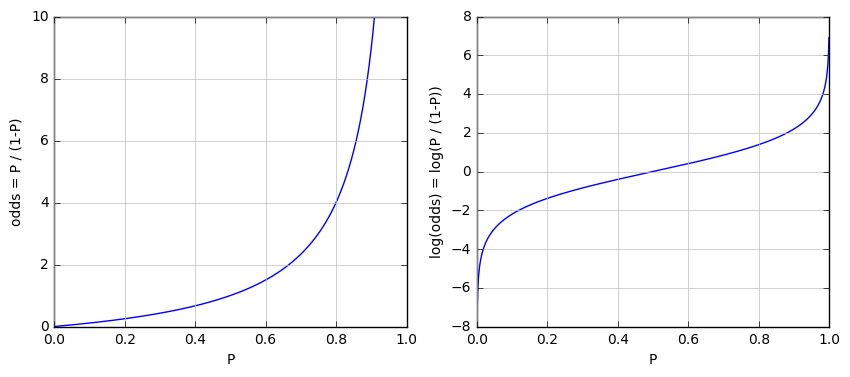

In [17]:
X = np.arange(0, 1, 0.001)
pyplot.figure(figsize=(10, 4))
pyplot.subplot(1, 2, 1)
pyplot.xlim((0, 1))
pyplot.ylim((0, 10))
pyplot.plot(X, X / (1 - X))
pyplot.xlabel("P")
pyplot.ylabel("odds = P / (1-P)")
pyplot.grid(True, linestyle='-', color='0.75')

pyplot.subplot(1, 2, 2)
pyplot.xlim((0, 1))
pyplot.plot(X, np.log(X / (1 - X)))
pyplot.xlabel("P")
pyplot.ylabel("log(odds) = log(P / (1-P))")
pyplot.grid(True, linestyle='-', color='0.75')


Если взять логарифм, то можно отобразить множество вероятностей в диапазоне от $0$ до $1$ на всю вещественную ось от минус до плюс бесконечности (см. правый график).
Важно, что это отображение монотонно - чем больше вероятность, тем больше логарифм отношения шансов - однако мы уе не ограничены только значениями 0 или 1.

Это значит, что теперь мы можем подогнать линейные комбинации наших признаков (признак пока один) под значения $log(odds)$. То есть мы заменяем линейную функцию $y_i = w_0 + w_1 x_1$ функцией $\log(\frac{p_i}{1-p_i}) = w_0 + w_1 x_1$.

Решая это уравнение относительно $p_i$ получаем, что $p_i = \frac{1}{1+e^(-w_0 + w_1 x_1)}$.

Нам нужно подобрать коэффициенты, так, чтобы эта формула давала наименьшие погрешности для всех пар $(x_i, y_i)$ из нашего набора.
И это как раз то, что умеет библиотека scikit-learn! После того как коэффициенты найдены, мы можем с легкостью вычислить вероятность принадлежности любого нового образца классу $1$.
Изобразив найденную модель на графике, увидим, что она отлично согласуется с данными.

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
[ 0.06210588] [ 1.83827432]
P(x=-1)=0.03	P(x=7)=0.82


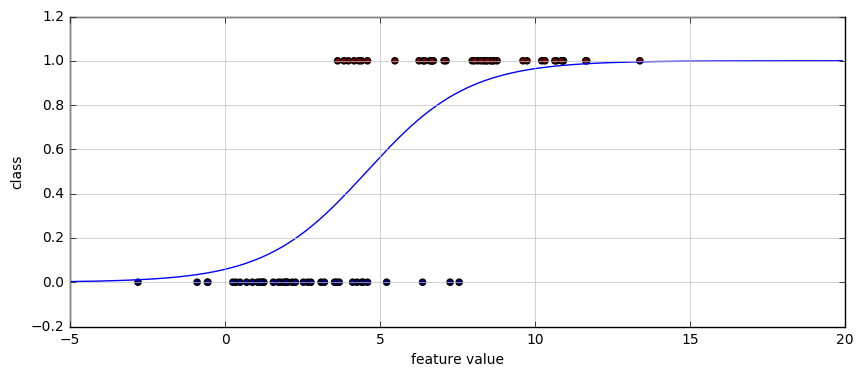

In [23]:
num_per_class = 40
X = np.hstack((norm.rvs(2, size=num_per_class, scale=2),
              norm.rvs(8, size=num_per_class, scale=3)))
y = np.hstack((np.zeros(num_per_class),
               np.ones(num_per_class)))


def lr_model(clf, X):
    return 1.0 / (1.0 + np.exp(-(clf.intercept_ + clf.coef_ * X)))

from sklearn.linear_model import LogisticRegression
logclf = LogisticRegression()
print(logclf)
logclf.fit(X.reshape(num_per_class * 2, 1), y)
print(np.exp(logclf.intercept_), np.exp(logclf.coef_.ravel()))
print("P(x=-1)=%.2f\tP(x=7)=%.2f" %
      (lr_model(logclf, -1), lr_model(logclf, 7)))
X_test = np.arange(-5, 20, 0.1)
pyplot.figure(figsize=(10, 4))
pyplot.xlim((-5, 20))
pyplot.scatter(X, y, c=y)
pyplot.plot(X_test, lr_model(logclf, X_test).ravel())
pyplot.xlabel("feature value")
pyplot.ylabel("class")
pyplot.grid(True, linestyle='-', color='0.75')
pyplot.show()

## Разрешающая граница (decision boundary)

Разрешающая граница дает лучшее понимание того, что вычисляет гипотеза.
Один из способов использования функции гипотезы следующий:
* когда вероятность того, что $y=1$ больше $0.5$, то предсказываем $y=1$;
* в противном случае, предсказываем $y=0$.

Это в точности сигмоидальная функция!

$g(z) \geq 0.5$, когда $z \geq 0$.

Итак, если $z>0$, то $g(z) > 0.5$.

А если $z = w^Tx$?
Тогда, если $w^T x \geq 0$, то получим: $h_w \geq 0.5$.
Как следствие, если $w^T x \leq 0$, тогда гипотеза предсказывает: $h_w \leq 0.5$ и ответ классификатора будет $0$.

### Понятие разрешающей границы

Пусть имеем гипотезу: $h_w(x) = g(w_0 + w_1x_1 + w_2x_2)$

Пусть, например,
* $w_0 = -3$
* $w_1 = 1$
* $w_2 = 1$

Пусть вектор наших параметров представляет собой вектор-столбец с указанными выше параметрами.
Тогда, $w^T = (-3, 1, 1)$

Что это значит?

Мы предсказывает $y=1$, если 
$$ -3x_0 + 1x_1 + 1x_2 \geq 0$$
$$ -3 + 1x_1 + 1x_2 \geq 0$$

Можем переписать это, как: если $(x_1 + x_2 \geq 3)$, то предсказываем $y=1$.
![](http://www.holehouse.org/mlclass/06_Logistic_Regression_files/Image%20[4].png)

Если мы построим $x_1 + x_2 = 3$ мы графически отобразим нашу **разрешающую границу (decision boundary)**: 
![](http://www.holehouse.org/mlclass/06_Logistic_Regression_files/Image%20[5].png)

Решающая граница означает, что мы имеем две области на графике:
* Синий - ложный;
* Пурпурный - истина;

Линия - представляет собой разрешающую границу.

Если говорить более конкретно, прямая линия представляет собой множество точек, где $h_w(x) = 0.5$. Решающая граница является свойством нашей гипотезы.

Мы можем создать границу с помощью нашей гипотезы и параметры без данных. Позже, мы будем использовать данные для определения параметров, например: $y=1$ если $5 - x_1 > 0$ (или $5 > x_1$).

## Нелинейные разрешающие границы

Логистическая регрессия используется для приспособления к сложным, нелинейным данным.
По аналогии с полиномиальной регрессией, добавим термы высших порядков, например:
$$ h_w(x) = g(w_0 + w_1 x_1 + w_3 x_1^2 + w_4 x_2 ^ 2)$$


Возьмем транспонированный вектор $w^T$ умноженный на входной вектор: 

Пусть $w^T = (-1, 0, 0, 1, 1)$ тогда мы говорим:
Предсказываем, что $y=1$, если $-1 + x_1^2 + x_2^2 \geq 0$ или $x_1^2 + x_2^2 \geq 1$.
Если мы построим $x_1^2 + x_2^2 = 1$, то получим круг с радиусом $1$ с центром в точке $(0,0)$

![](http://www.holehouse.org/mlclass/06_Logistic_Regression_files/Image%20[6].png)

Это значит, что мы можем построить даже более сложные разрешающие границы, адаптируя параметры к этой (относительно) простой гипотезе.

Используя полиномиальные термы более высоких порядков, мы можем получить даже более сложные решающие границы.

![](http://www.holehouse.org/mlclass/06_Logistic_Regression_files/Image%20[7].png)

## Функция потерь (Cost function) для логистической регрессии

Нам необходимо подобрать вектор параметров $w$.

Итак, пусть мы имеем:
* Тренировочную выборку из $m$ объектов
$$ \{ (x^{(1)}, y^{(1)}) , (x^{(2)}, y^{(2)}), \ldots, (x^{(m)}, y^{(m)}) \}$$

* Каждый пример представляет собой вектор размерности $p+1$: 
 $$\begin{align}
    x &\in 
         \begin{bmatrix}
           x_{0} \\
           x_{1} \\
           \vdots \\
           x_{p}
         \end{bmatrix}
  \end{align}, x_0 = 1$$
* Целевая переменная : $ y \in \{0, 1\}$
* Гипотеза базируется на параметрах $w$:
$$h_w(x) = \frac{1}{1 + e^{-w^{T}x}}$$.

Итак, как на базе тренировочной выборки подобрать $w$?


Линейная регрессия использует следующую функцию для определения параметров:
$$ J(w) = \frac{1}{m}\sum_{i=1}^{m}\frac{1}{2}(h_w(x^{(i)})-y^{(i)})^2$$

Чтобы постоянно не переписывать квадрат суммы, введем обозначение:
$$ Cost(h_w(x^{(i)}), y^{(i)}) = \frac{1}{2}(h_w(x^{(i)})-y^{(i)})^2$$

Которая вычисляет функцию потерь для отдельного примера используя ту же метрику, что используется в линейной регрессии. 

Итак, теперь мы можем переопределить функцию потерь:

$$ J(w) = \frac{1}{m}\sum_{i=1}^{m} Cost(h_w(x^{(i)}), y^{(i)})$$

Которая, является суммой всех индивидуальных потерь в тренировочной выборке (т.е. то же, что и в линейной регрессии).
Для простоты опустим индексацию:

$$ J(w) = \frac{1}{m}\sum_{i=1}^{m} Cost(h_w(x), y)$$

Что же это значит?

Фактически, это функция потерь, которую мы хотим минимизировать. Функция потерь, которую алгоритм "платит" если гипотеза $h_w(x)$ и фактический исход отличаются друг от друга.

При использовании функции для логистической регрессии следует помнить, что она **невыпуклая функция**.

Что значит **невыпуклая функция**?

Мы имеем некоторую функцию потерь $J(w)$, которую хотим использовать для определения параметров $w$.

Наша функция-гипотеза является **нелинейной** (логистическая функция $h_w(x)$). Причем, эта функция является достаточно сложной.

Возьмем $h_w(x)$ и подставим её в функцию $Cost()$.

А затем функцию $Cost()$ в $J(w)$. Построив $J(w)$ мы найдем несколько локальных оптимумов -> невыпуклая функция.
Это является проблемой, поскольку алгоритм градиентного спуска может не найти глобальный оптимум - и может "застрять" в локальном минимуме.

Мы бы хотели найти выпуклую функцию, чтобы запустим градиентный спуск он бы сошелся к глобальному минимуму.

## Выпуклая функция потерь для логистической регрессии

Чтобы обойти проблему, нам нужна выпуклая функция $Cost()$ к которой можно применить алгоритм градиентного спуска.
$$Cost(h_w(x), y) = \begin{cases} -\log(h_w(x)), & \mbox{если } y = 1\\ -\log(1-h_w(x)), & \mbox{если } y=0 \end{cases}$$

Эта функция потерь для логистической регрессии, которая фактически представляет собой штраф, который платит алгоритм, при несовпадении значения гипотезы с фактическим значением целевой переменной для конкретного объекта.

Построим функцию для $y=1$.
$h_w(x)$ оценивается как $-\log(h_w(x))$.
![](http://www.holehouse.org/mlclass/06_Logistic_Regression_files/Image%20[13].png)

* Ось X - что мы предсказываем
* Ось Y - стоимость, связанная с предсказанием

Если гипотеза $h_w(x)$ в точности предсказывает $1$ - т.е. в точности корректна, тогда "штраф" равен нулю (в точности нулю).
Также это захватывает случай, когда гипотеза дает $h_w(x) = 0$ (предсказывает $\Pr(y=1 \mid x; w)$), но $y=1$, тогда это приведет к штрафу обучающего алгоритма.

А что если $y=0$, тогда функция потерь вычисляется как $-\log(1-h_w(x))$.
![](http://www.holehouse.org/mlclass/06_Logistic_Regression_files/Image%20[14].png)

Сейчас она стремится к бесконечности при $h_w(x) \to 1$.
Итак, используя приведенную функцию потерь $J(w)$ становится выпуклой.

## Упрощенная функция потерь для логистической регрессии

Определим простой способ записать функцию потерь и применить алгоритм градиентного спуска к логистической регрессии.
Функция потерь для логистической регрессии выглядит следующим образом:
$$ J(w) = \frac{1}{m}\sum_{i=1}^{m} Cost(h_w(x), y)$$
$$Cost(h_w(x), y) = \begin{cases} -\log(h_w(x)), & \mbox{если } y = 1\\ -\log(1-h_w(x)), & \mbox{если } y=0 \end{cases}$$

Заметим, что **$y$ всегда равен либо $0$, либо $1$**.

Для бинарной классификации $y$ всегда равен 0 или 1, и поэтому, есть простой способ переписать функцию потерь в одно уравнение.
Мы можем записать функцию потерь следующим образом:
$$ Cost(h_w(x),y) = -y\log( h_w(x)) - (1-y)\log(1-h_w(x))$$
Это выражение представляет собой более удобную запись системы.

Итак, функцию потерь с параметром $w$ можно определить как:
$$ J(w) = \frac{1}{m}\sum_{i=1}^{m}(-y^{(i)}\log( h_w(x^{(i)})) - (1-y^{(i)})\log(1-h_w(x^{(i)})))$$

Почему мы выбираем именно такую функцию потерь, когда существуют и другие функции потерь?

Эта функция может быть выведена из статистики с использованием принципа максимального правдоподобия (но в таом случае, в основе должно лежать предположение о Гауссовом распределении атрибутов).
Также эта функция обладает желаемым для нас свойством *выпуклости*.

Как подобрать параметры $w$?

Просто найти параметры $w$, которые минимизируют функцию потерь $J(w)$. 

Это означает, что мы имеем множество параметров, которые используются в нашей модели для последующих предсказаний.
Затем, когда мы получим новый пример с множеством атрибутов $x$, мы можем взять полученный (с помощью градиентного спуска) $w$ и вывести наше предсказание с использованием функции:
$$h_w(x) = \frac{1}{1 + e^{-w^{T}x}}$$.

Что дает нам: $\Pr( y=1 \mid x; w)$.

**Как мы можем минимизировать функцию потерь логистической регрессии?**

Итак, сейчас мы хотим вычислить минимум функции потерь $J(w)$. Для этого используется алгоритм *градиентного спуска* так же, как и ранее.
Просто итеративно обновляем каждый параметр с использованием learning rate:

$$ w_j := w_j - \alpha \sum_{i=1}^{m}(h_w(x^{(i)}) - y^{(i)})x_j^{(i)}$$
**ОДНОВРЕМЕННОЕ ОБНОВЛЕНИЕ ВСЕХ $w_j$**

Если мы имеем $n$ атрибутов, тогда имеем вектор-столбец размерности $n+1$ для вектора параметров $w$.
Это выражение **тоже самое, что и для линейной регрессии**.

Разница только одна: предположение о гипотезе претерпело изменение.

Следует помнить о том, что мы обязаны обновлять **все значения $w = (w_0, \ldots, w_n)$ одновременно**.

## Дополнительная оптимизация

Мы уже видели ранее алгоритм градиентного спуска для минимизации функции потерь.

Сейчас мы рассмотрим дополнительные концепции, связанные с вопросом минимизации функции потерь для логистической регрессии. Они используются для достаточно объемных проблем в машинном обучении (например, достаточно большом множестве атрибутов).

Что фактически делает градиентный спуск?

Мы имеем некоторую функцию стоимости $J(w)$ и хотим её минимизировать.

Нужно написать код, который возьмет $w$ на входе и вычислит:
* J(w)
* Частные производные $J(w)$ (по всем $w_j$).

Алгоритм градиентного спуска итеративно выполняет следующее обновление:
$$ w_j := w_j - \alpha \frac{\partial J(w)}{\partial w_j}$$

Итак, происходит **одновременное** обновление каждого $j$ в $w$.
Итак, мы должны:
* написать процедуры для вычисления $J(w)$ и её производных
И затем подставить эти значения в алгоритм градиентнорго спуска.

В качестве альтернативы, вместо градиентного спуска для минимизации функции потерь мы можем использовать:
* Conjugate gradient
* BFGS (Broyden-Fletcher-Goldfarb-Shanno)
* L-BFGS (Limited memory - BFGS)
Всё это довольно сложные, но очень эффективные алгоритмы.

## Проблемы многоклассовой классификации

*Многоклассовая классификация* - имеем больше двух классов.
![](http://www.holehouse.org/mlclass/06_Logistic_Regression_files/Image%20[23].png)

Пусть задан набор данных с тремя классами, как мы можем обучить алгоритм работать с ними?
Можно применить стратегию **один против всех (one vs. all)**.

### One vs. all classification
Разделить обучающую выборку на три различных задачи бинарной классификации.
Т.е. создать новую тренировочную выборку:
![](http://www.holehouse.org/mlclass/06_Logistic_Regression_files/Image%20[24].png)

* Треугольники (1) vs крестиков и квадратов (0) $h_{w1}(x)$: $\Pr(y=1 \mid x1; w)$
* Крестики (1) vs треугольников и квадратов(0) $h_{w2}(x)$: $\Pr(y=1 \mid x2; w)$
* Квадраты (1) vs крестиков and треугольников (0) $h_{w3}(x)$ : $\Pr(y=1 \mid x3; w)$.


#### Некоторые важные моменты, касающиеся логистической регрессии

* Логистическая регрессия широко используется для решения задач классификации;
* Логистическая регрессия **не требует линейных отношений** между зависимыми и независимыми переменными. Она может обрабатывать различные типы отношений, поскольку она применяет **нелинейное логарифмическое преобразование** к предсказанным весовым коэффициентам;
* Чтобы избежать недообучения и переобучения следует включать все значимые (significant) переменные.
* Логистическая регрессия требует достаточно большой тренировочной выборки (поскольку по сравнению с методом наименьших квадратов, оценка вероятностей выполняется менее эффективно на малой тренировочной выборке);
* Независимые переменные не должны коррелировать друг с другом (т.е. не должно быть мультиколлинеарности). однако, есть методы для включения эффектов взаимодействия категориальных переменных в анализ данных и в модель логистической регрессии.
* Если значения зависимой переменной являются **порядковыми (ordinal)** тогда используется т.н. **Ordinal logistic regression**;
* Если значения зависимой переменной являются мультиклассовыми, тогда используется т.н. **Multinomial Logistic Regression**.


### Логистическая регрессия в scikit-learn и её использование

In progress